
# Ssemambo Joshua Humble
## M24B38/003
## BSDS

 **Importing neccessary libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import chi2_contingency


**Import dataset as a pandas dataframe called data1**

In [11]:
data1 = pd.read_csv("/Users/user/Desktop/SEM2/PROB AND STAT/Assignment/SEM_test_1/healthcare_dataset.csv")
#view dataframe information
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

**A. Explain the central tendency and distribution of any two continous variables**

In [13]:
#choosing the continous variables to use 
age = data1['Age']
billing_amount = data1['Billing Amount']

#central tendecy
mean_age = age.mean()
median_age = age.median()
mode_age = age.mode()[0]
mean_billAmount = billing_amount.mean()
median_billAmount = billing_amount.median()
mode_billAmount = billing_amount.mode()[0]
#print central tendency results 
print(f"Age - Mean: {mean_age}, Median: {median_age}, Mode: {mode_age}") 
print(f"Billing Amount - Mean: {mean_billAmount}, Median: {median_billAmount}, Mode: {mode_billAmount}")

Age - Mean: 51.53945945945946, Median: 52.0, Mode: 38


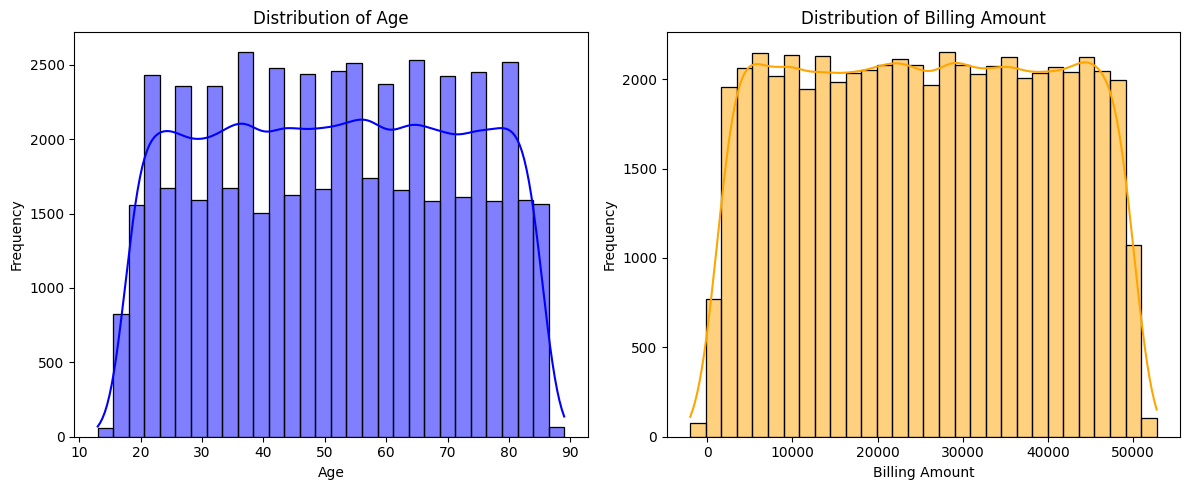

In [16]:
#Distributon visualisation
plt.figure(figsize= (12, 5))

plt.subplot(1, 2, 1)
sns.histplot(age, bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(billing_amount, bins=30, kde=True, color='orange')
plt.title('Distribution of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**B. Explain the marginal probability of any two categorical variables**

In [19]:
#Choosing two categorical variables: Gender and Admission type
gender_counts = data1['Gender'].value_counts()
admission_type_counts = data1['Admission Type'].value_counts()
#marginal probabilities
total_patients = len(data1)
marginal_gender = gender_counts / total_patients
marginal_admission_type = admission_type_counts / total_patients
#printing marginal probabilities
print("Marginal probability of Gender:")
print(marginal_gender)
print("\nMarginal probability of Admission Type:")
print(marginal_admission_type)

Marginal probability of Gender:
Gender
Male      0.500432
Female    0.499568
Name: count, dtype: float64

Marginal probability of Admission Type:
Admission Type
Elective     0.336126
Urgent       0.334703
Emergency    0.329171
Name: count, dtype: float64


**C. Explain the relationship between the "Medical Condition" and "Admission Type"**

In [20]:
#Use a contigency table to analyse the relationship
cont_table = pd.crosstab(data1['Medical Condition'], data1['Admission Type'])
print(f"Contigency table of Medical condition and Admission Type: \n{cont_table}")

Contigency table of Medical condition and Admission Type: 
Admission Type     Elective  Emergency  Urgent
Medical Condition                             
Arthritis              3083       3108    3117
Asthma                 3102       3002    3081
Cancer                 3148       3015    3064
Diabetes               3058       3017    3229
Hypertension           3221       3001    3023
Obesity                3043       3126    3062


In [23]:
#Perform a Chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)
print(f"Statistics obtained from the Chi-Square test: {chi2}, \np-value:{p}")

#Interpretation of my p-value
standard = 0.05
if p < standard:
    print("Significant relationship between Medical condition and Amission type")
else:
    print("No significant relationship between Medical condition and Admission Type")

Statistics obtained from the Chi-Square test: 19.33817017443342, 
p-value:0.036171783236322336
Significant relationship between Medical condition and Amission type
